In [ ]:
import numpy as np
import pandas as pd
import nltk
import spacy
from tqdm import tqdm
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# load file names
pos_files = os.listdir("C:/Users/SWASTHITHA/Desktop/TextClassificationProject/positive/")
neg_files = os.listdir("C:/Users/SWASTHITHA/Desktop/TextClassificationProject/negative/")

In [ ]:
print(pos_files[:10]) #files with postive reviews

In [ ]:
print(neg_files[:10]) #files with negative review

In [ ]:
len(pos_files)#size of positive files

In [ ]:
len(neg_files)#SIZE of negative files

In [ ]:
def read_review(filename):#to read text file
    file=open(filename,mode='rt',encoding='utf-8')# read mode only and charcter encoding
    text=file.read()# read all the text
    file.close() 
    return text

In [20]:


# read and store positive reviews in a list
pos = []

for i in pos_files:
    pos.append(read_review("C:/Users/SWASTHITHA/Desktop/MachineLearning/positve/"+i))
    
# read and store negative reviews in a list
neg = []

for i in neg_files:
    neg.append(read_review("C:/Users/SWASTHITHA/Desktop/MachineLearning/negative/"+i))

In [21]:
df=pd.DataFrame({'review':(pos+neg)})
df['class']=0
df['class'][:10000]=1
# 1 for positive 0 for negtive

C:\Users\SWASTHITHA\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
df.tail()

,review,class
17995,Although the production and Jerry Jameson's di...,0
17996,Capt. Gallagher (Lemmon) and flight attendant ...,0
17997,"Towards the end of the movie, I felt it was to...",0
17998,This is the kind of movie that my enemies cont...,0
17999,Some films that you pick up for a pound turn o...,0


In [23]:
df['class'].value_counts()

1    10000
0     8000
Name: class, dtype: int64

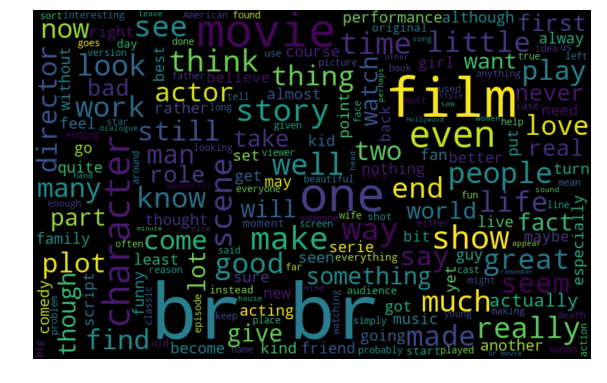

In [24]:
all_words = ' '.join([text for text in df['review']])



from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
df['review'][9127]

'In my opinion, October Sky is one of the best movies of 1999...It totally has everything an emotional drama movie would need, like, wonderful story and good character interactions. October Sky will remain in heart for as long as I can remember, and I just have to say a very special thanks to those who have created this film.'

In [26]:
#Data cleaning
replace_1 = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])")
replace_2 = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

In [27]:
#function to clean data
def clean_reviews(reviews):
    reviews=[replace_1.sub("",line.lower()) for line in reviews]
    reviews=[replace_2.sub("",line.lower())for line in reviews]
    return reviews

In [28]:
df['review']=clean_reviews(df['review'])

In [29]:
df['review'][9127] # review afetr cleaning 

'in my opinion october sky is one of the best movies of 1999it totally has everything an emotional drama movie would need like wonderful story and good character interactions october sky will remain in heart for as long as i can remember and i just have to say a very special thanks to those who have created this film'

In [30]:
import nltk
from nltk import FreqDist

In [31]:
# function to plot top n most frequent words
def freq_words(x, terms = 10):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})
  
  # selecting top n most frequent words
  d = words_df.nlargest(columns="count", n = terms) 
  plt.figure(figsize=(20,5))
  ax = sns.barplot(data=d, x= "word", y = "count")
  ax.set(ylabel = 'Count')
  plt.show()

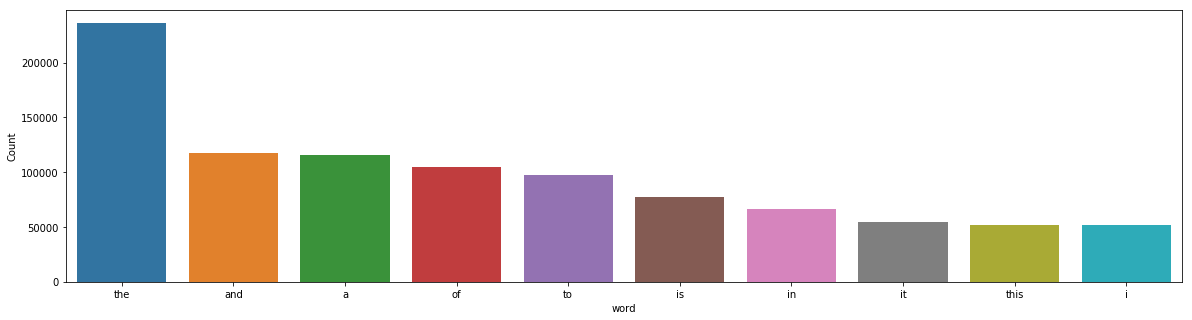

In [32]:
freq_words(df['review'])

In [33]:
import en_core_web_sm

In [34]:
nlp = en_core_web_sm.load()

In [35]:
nlp.vocab['however'].is_stop = False
nlp.vocab['no'].is_stop = False
nlp.vocab['not'].is_stop = False
nlp.vocab['but'].is_stop = False

In [36]:
# tokenization using spaCy
def tokenization(x):
    reviews_tokens = []
    for i in tqdm(x):
        i = nlp(i)
        temp = []
        for j in i:
            temp.append(j.text)
        reviews_tokens.append(temp)
    
    return reviews_tokens

In [37]:
df['tokenized_review']=tokenization(df['review'])

100%|████████████████████████████████████████████████████████████████████████████| 18000/18000 [12:14<00:00, 24.52it/s]


In [38]:
# function to remove stopwords
def strip_stopwords(reviews):
    s = []
    for r in tqdm(reviews):
        s_2 = []
        for token in r:
            if nlp.vocab[token].is_stop == True:
                continue
            else:
                s_2.append(token)
        s.append(" ".join(s_2))    
        
    return s

In [39]:
df['review_cleaned']=strip_stopwords(df['tokenized_review'])

100%|██████████████████████████████████████████████████████████████████████████| 18000/18000 [00:05<00:00, 3507.19it/s]


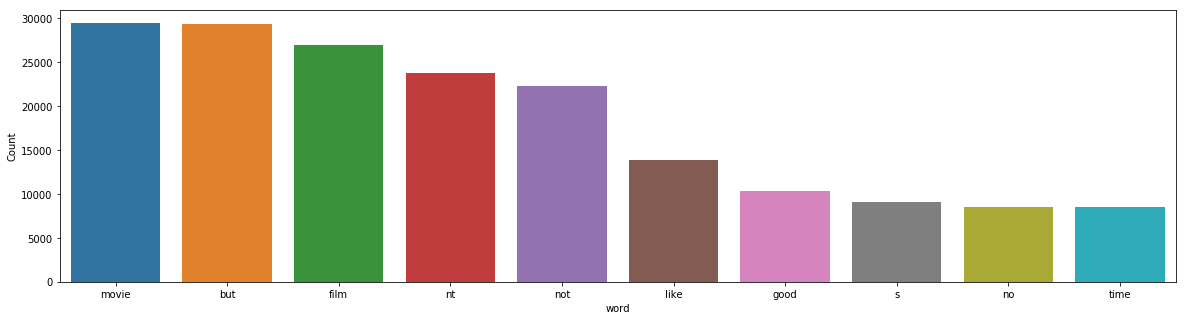

In [40]:
freq_words(df['review_cleaned'])

In [41]:
# remove 1 character terms (length == 1)
df['review_cleaned']=df['review_cleaned'].apply(lambda x:' '.join([w for w in x.split() if len(w)>1 ]))

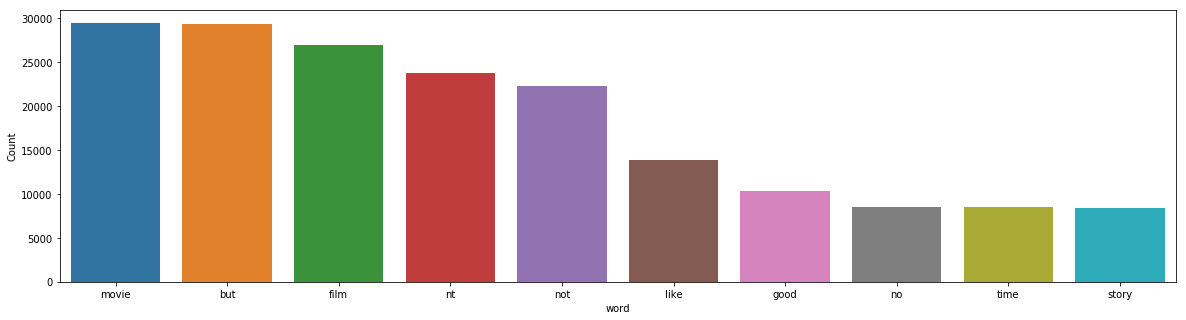

In [42]:
freq_words(df['review_cleaned'])

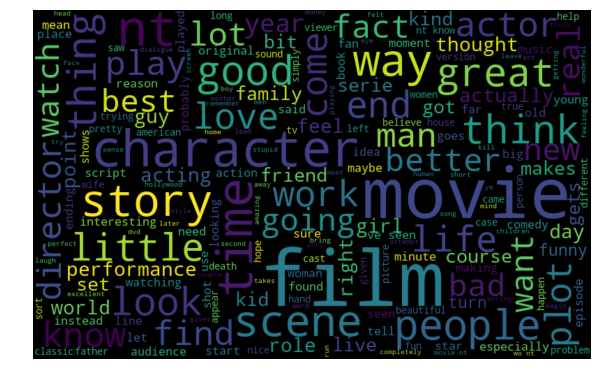

In [43]:
all_words = ' '.join([text for text in df['review_cleaned']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [44]:
#split data 
#After cleaning and pre-processing of the reviews, 
#we can now split our data into 3 sets — train, validation,
#and test — in the ratio of 70%, 15% and 15%, respectively

# splitting data into train, test, and validation set
from sklearn.model_selection import train_test_split
train, temp = train_test_split(df, stratify = df['class'], test_size=0.3, random_state=42)

test, val = train_test_split(temp, stratify = temp['class'], test_size=0.5, random_state=42)

In [45]:

train.shape,val.shape,test.shape

((12600, 4), (2700, 4), (2700, 4))

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [47]:
# build bag-of-words features for train data
bow = CountVectorizer(binary=False, min_df=5, max_df=1.0, ngram_range=(1,2))
bow_train = bow.fit_transform(train['review_cleaned'])

# build TF-IDF features for train data
tfidf = TfidfVectorizer(use_idf=True, min_df=5, max_df=1.0, ngram_range=(1,2),
                        sublinear_tf=True)
tfidf_train = tfidf.fit_transform(train['review_cleaned'])

In [48]:
# create features for validation and test set
bow_val = bow.transform(val['review_cleaned'])
tfidf_val = tfidf.transform(val['review_cleaned'])

bow_test = bow.transform(test['review_cleaned'])
tfidf_test = tfidf.transform(test['review_cleaned'])

In [49]:
print('BOW model:> Train features shape:', bow_train.shape, ' Validation features shape:', bow_val.shape, 
      ' Test features shape:', bow_test.shape)

print('TFIDF model:> Train features shape:', tfidf_train.shape, ' Validation features shape:', tfidf_val.shape,
      ' Test features shape:', tfidf_test.shape)

BOW model:> Train features shape: (12600, 40895)  Validation features shape: (2700, 40895)  Test features shape: (2700, 40895)
TFIDF model:> Train features shape: (12600, 40895)  Validation features shape: (2700, 40895)  Test features shape: (2700, 40895)


In [50]:
#Model Building

from sklearn.linear_model import LogisticRegression

In [51]:
lr=LogisticRegression()

In [52]:
# train model on bag of words
lr.fit(bow_train,train['class'])


C:\Users\SWASTHITHA\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [53]:
#make predictions on validation set
bow_val_preds=lr.predict(bow_val)

In [54]:
#make predictions on test set
bow_test_preds=lr.predict(bow_test)

In [55]:
bow_test_preds

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score

In [57]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.8644444444444445
Test accuracy score:  0.8770370370370371


In [58]:
# train model on tdidf features
lr.fit(tfidf_train, train['class'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [59]:
#make predictions on validation set
lr.fit(tfidf_train, train['class'])
tfidf_val_preds = lr.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = lr.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8811111111111111
Test accuracy score:  0.8766666666666667


In [60]:
val['class']

2423     1
9896     1
16748    0
502      1
11276    0
3671     1
17715    0
10753    0
312      1
3961     1
986      1
9150     1
11985    0
13236    0
5318     1
10870    0
16383    0
10954    0
12793    0
7641     1
17583    0
14978    0
12590    0
14876    0
12035    0
8226     1
13840    0
11713    0
11742    0
13476    0
        ..
710      1
9628     1
4308     1
2210     1
10089    0
12738    0
14809    0
12449    0
15947    0
4782     1
10302    0
17959    0
14599    0
9959     1
4711     1
15872    0
1146     1
4416     1
17905    0
12129    0
8789     1
11719    0
17215    0
4584     1
15535    0
701      1
10275    0
9127     1
7140     1
17448    0
Name: class, Length: 2700, dtype: int64

In [61]:
val['class'].value_counts()

1    1500
0    1200
Name: class, dtype: int64

In [62]:
val['class'][17448]

0

In [63]:
df['review'][17448]

'there are people out there who will greenlight anything that is the only explanation i can offer as to why the house of the dead movie exists and thats only scary part to the whole movie its so bad youll go off movies forever i seriously wanted to switch this off and turn the tv over to the paint drying channel but i was bound by my word to suffer the whole thing i dont know why i do these bad things to myselfas if it matters heres the basic jist of the story a group of twentysomethings are so desperate to go out to some island in the pacific northwest canada actually because its cheap for the rave of the century which consists of about 8 people and unraving music that they pay some craggy old fisherman $1000 to take them there after they miss the main ferry thats gotta be some rave to be worth all that dough the fisherman warns them that the island is also known as the island of the dead hang oni thought this was house of the dead and that they are all doomed yadda yadda yaddafirst f

In [64]:
train['class'].value_counts()

1    7000
0    5600
Name: class, dtype: int64

In [65]:
test['class'].value_counts()

1    1500
0    1200
Name: class, dtype: int64

In [66]:
df['review'][9127]

'in my opinion october sky is one of the best movies of 1999it totally has everything an emotional drama movie would need like wonderful story and good character interactions october sky will remain in heart for as long as i can remember and i just have to say a very special thanks to those who have created this film'

In [67]:
val['class'][9127]

1

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

In [69]:
gb=GradientBoostingClassifier()
# train model on bag of words
gb.fit(bow_train,train['class'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [70]:
#make predictions on validation set
bow_val_preds=gb.predict(bow_val)
#make predictions on validation set
bow_test_preds=gb.predict(bow_test)

In [71]:
from sklearn.metrics import accuracy_score

In [72]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.797037037037037
Test accuracy score:  0.7974074074074075


In [73]:
gb.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = gb.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = gb.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8014814814814815
Test accuracy score:  0.7951851851851852


In [74]:

from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB

In [75]:
nb=MultinomialNB()
# train model on bag of words
nb.fit(bow_train,train['class'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [76]:
#make predictions on validation set
bow_val_preds=nb.predict(bow_val)
#make predictions on validation set
bow_test_preds=nb.predict(bow_test)

In [77]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.8548148148148148
Test accuracy score:  0.8637037037037038


In [78]:
nb.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = nb.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = nb.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8522222222222222
Test accuracy score:  0.867037037037037


In [79]:
dc=DummyClassifier()
# train model on bag of words
dc.fit(bow_train,train['class'])

DummyClassifier(constant=None, random_state=None, strategy='stratified')

In [80]:
#make predictions on validation set
bow_val_preds=dc.predict(bow_val)
#make predictions on validation set
bow_test_preds=dc.predict(bow_test)

In [81]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.5018518518518519
Test accuracy score:  0.48518518518518516


In [82]:
dc.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = dc.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = dc.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.5085185185185185
Test accuracy score:  0.5107407407407407


In [83]:
from sklearn.linear_model import SGDClassifier

In [84]:
SGD=SGDClassifier()
# train model on bag of words
SGD.fit(bow_train,train['class'])

C:\Users\SWASTHITHA\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [85]:
#make predictions on validation set
bow_val_preds=SGD.predict(bow_val)
#make predictions on validation set
bow_test_preds=SGD.predict(bow_test)

In [86]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.8414814814814815
Test accuracy score:  0.8540740740740741


In [87]:
SGD.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = SGD.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = SGD.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8848148148148148
Test accuracy score:  0.8866666666666667


In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
rf=RandomForestClassifier()
# train model on bag of words
rf.fit(bow_train,train['class'])

C:\Users\SWASTHITHA\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [90]:
#make predictions on validation set
bow_val_preds=rf.predict(bow_val)
#make predictions on validation set
bow_test_preds=rf.predict(bow_test)

In [91]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.7807407407407407
Test accuracy score:  0.7777777777777778


In [92]:
rf.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = rf.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = rf.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.7796296296296297
Test accuracy score:  0.7707407407407407


In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dtc=DecisionTreeClassifier()
# train model on bag of words
dtc.fit(bow_train,train['class'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [95]:
#make predictions on validation set
bow_val_preds=dtc.predict(bow_val)
#make predictions on validation set
bow_test_preds=dtc.predict(bow_test)

In [96]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.7155555555555555
Test accuracy score:  0.7081481481481482


In [97]:
dtc.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = dtc.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = dtc.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.7074074074074074
Test accuracy score:  0.7144444444444444


In [98]:
from sklearn.neural_network import MLPClassifier

In [99]:
mlp=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
# train model on bag of words
mlp.fit(bow_train,train['class'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [100]:
#make predictions on validation set
bow_val_preds=mlp.predict(bow_val)
#make predictions on validation set
bow_test_preds=mlp.predict(bow_test)

In [101]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))

Validation accuracy score:  0.8785185185185185
Test accuracy score:  0.8870370370370371


In [102]:
mlp.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = mlp.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = mlp.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.8851851851851852
Test accuracy score:  0.8903703703703704


In [103]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(bow_train,train['class'])

C:\Users\SWASTHITHA\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [104]:
#make predictions on validation set
bow_val_preds=svc.predict(bow_val)
#make predictions on validation set
bow_test_preds=svc.predict(bow_test)

In [105]:
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], bow_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], bow_test_preds))


Validation accuracy score:  0.5811111111111111
Test accuracy score:  0.5844444444444444


In [106]:
mlp.fit(tfidf_train, train['class'])
#make predictions on validation set

tfidf_val_preds = svc.predict(tfidf_val)

#make predictions on test set
tfidf_test_preds = svc.predict(tfidf_test)
# model evaluaton
print("Validation accuracy score: ", accuracy_score(val['class'], tfidf_val_preds))
print("Test accuracy score: ", accuracy_score(test['class'], tfidf_test_preds))

Validation accuracy score:  0.5555555555555556
Test accuracy score:  0.5555555555555556
